<h1 style="text-align:center">Frequency Response to Harmonic Direct-Force Inputs</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_DirectForce_Horiz.png" alt="A Mass-Spring-Damper System" width=50%></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook examines the frequency response of a mass-spring-damper system like the one shown in Figure 1 to a harmonic, direct-force input.

The equation of motion for the system is:

<!-- the \quad commmand just adds a space in the math mode -->
$ \quad m \ddot{x} + c \dot{x} + kx = f $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n \dot{x} + \omega_n^2x = \frac{f}{m}$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

In [3]:
# Import the plotting functions 
import matplotlib.pyplot as plt

In [4]:
# Define the System Parameters
m = 1.0                 # kg
k = (2.0 * np.pi)**2    # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)     # Natural Frequency (rad/s)

z = 0.25                # Define a desired damping ratio
c = 2 * z * wn * m      # calculate the damping coeff. to create it (N/(m/s))

Let's use the closed-form, steady-state solution we developed in lecture:

Assume:

$ \quad f(t) = \bar{f} \sin{\omega t} $

Then, the solution $x(t)$ should have the form:

$ \quad x(t) = | x | \sin{\left( \omega t + \phi \right) } $

Substituting this assumed solution into the equation of motion and solving for $ \bar{x} $ and $ \phi $: 

$ \quad | \bar{x} | = \frac{\bar{f}}{m} \left( \frac{1}{\sqrt{\left(\omega_n^2 - \omega^2\right)^2 + \left(2 \zeta \omega_n \right)^2}} \right) $

and

$ \quad \phi = \tan^{-1}\left({\frac{2 \zeta \omega_n \omega}{\omega_n^2 - \omega^2}}\right) $


### Transfer Function Form
$ \quad \left| G(\omega) \right| = \frac{1}{m \sqrt{\left(\omega_n^2 - \omega^2\right)^2 + \left(2 \zeta \omega_n \right)^2}} $

### Normalization
We can also nondimensionalize/normalize this by defining $ \Omega = \frac{\omega}{\omega_n} $.

$ \quad \left| G(\Omega) \right| = \frac{1}{k \sqrt{\left(1 - \Omega^2\right)^2 + \left(2 \zeta \Omega \right)^2}} $

and

$ \quad \phi = \tan^{-1}\left({\frac{2 \zeta \Omega}{1 - \Omega^2}}\right) $

Let's plot the normalized versions.

In [5]:
# Set up input parameters
wun = np.linspace(0,5,500)          # Frequency range for freq response plot, 0-4 Omega with 500 points in-between
w = np.linspace(0,5,500)            # Frequency range for freq response plot, 0-4 Omega with 500 points in-between

# Let's examine a few different damping ratios
z = 0.0
mag_normal_un = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_un = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi

# Let's mask the phase discontinuity, so it isn't plotted
pos = np.where(np.abs(k*mag_normal_un) >= 25)
phase_un[pos] = np.nan
wun[pos] = np.nan


z = 0.1
mag_normal_0p1 = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_0p1 = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi


z = 0.2
mag_normal_0p2 = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_0p2 = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi


z = 0.4
mag_normal_0p4 = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_0p4 = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi

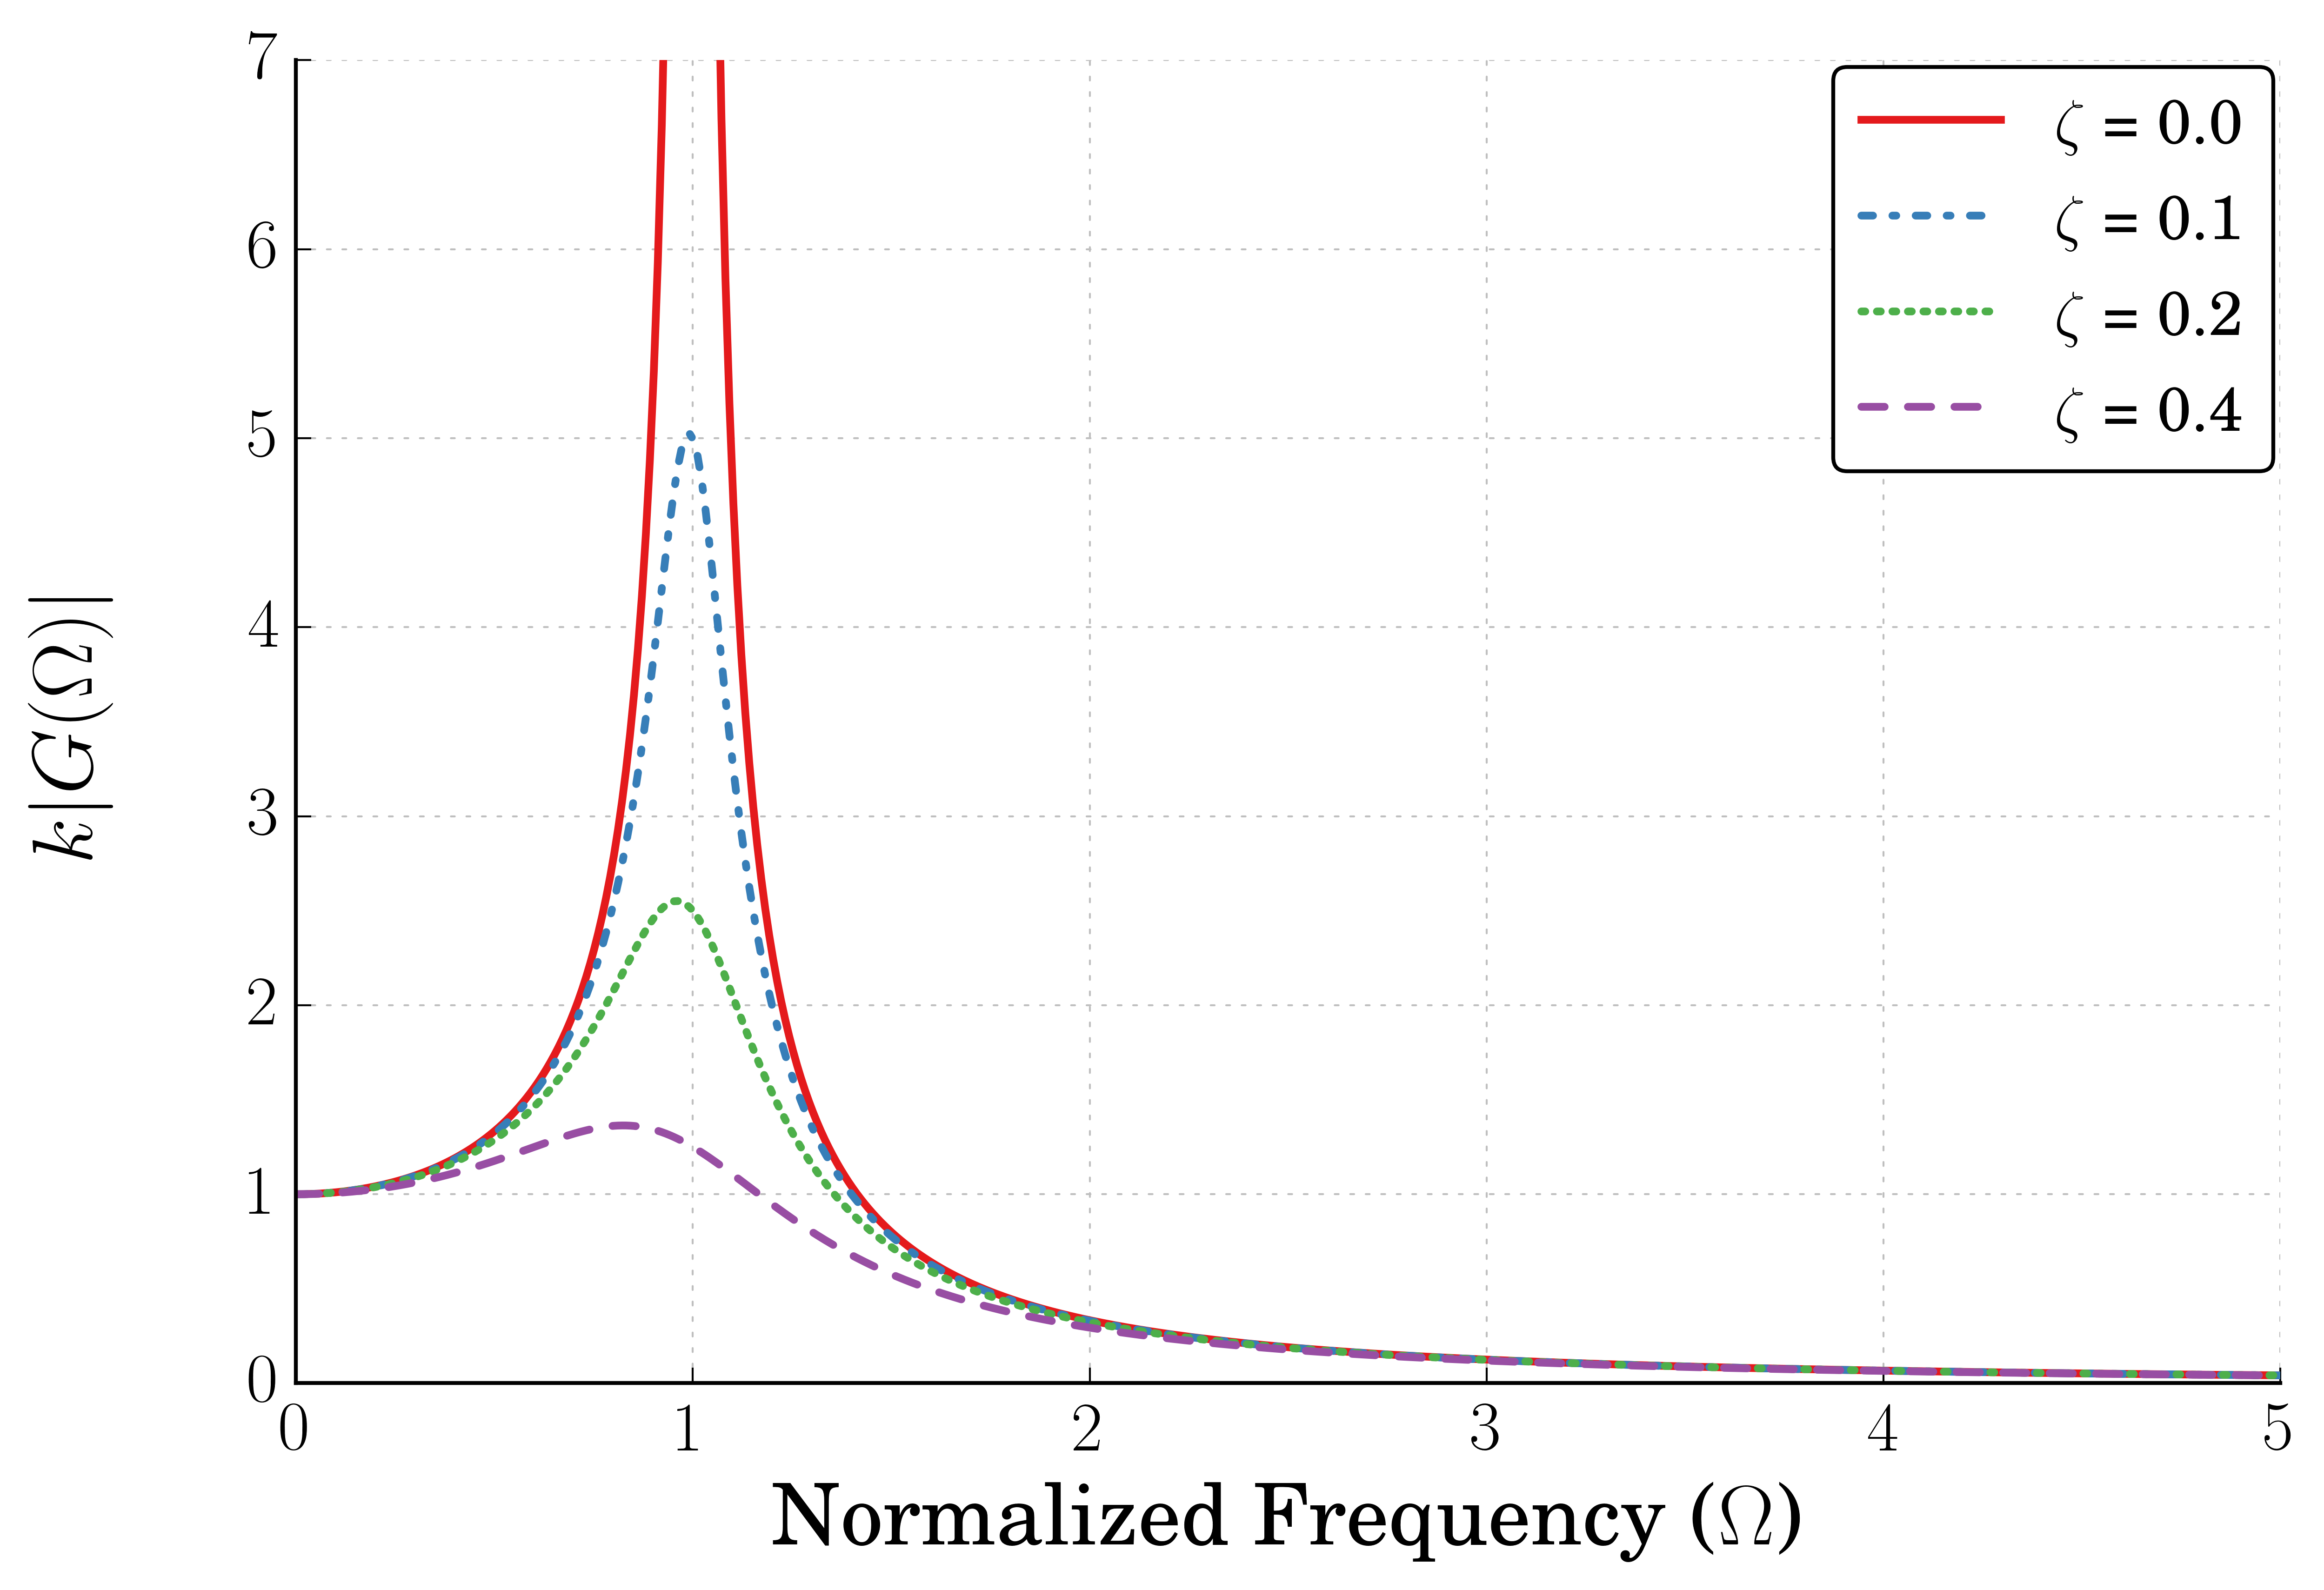

In [6]:
# Let's plot the magnitude (normlized by k G(Omega))

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency ($\Omega$)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$k |G(\Omega)|$',family='Serif',fontsize=22,weight='bold',labelpad=35)

plt.plot(wun, k*mag_normal_un, linewidth=2, label=r'$\zeta$ = 0.0')
plt.plot(w, k*mag_normal_0p1, linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.1')
plt.plot(w, k*mag_normal_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
plt.plot(w, k*mag_normal_0p4, linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.4')

plt.xlim(0,5)
plt.ylim(0,7)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Forced_Freq_Resp_mag.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

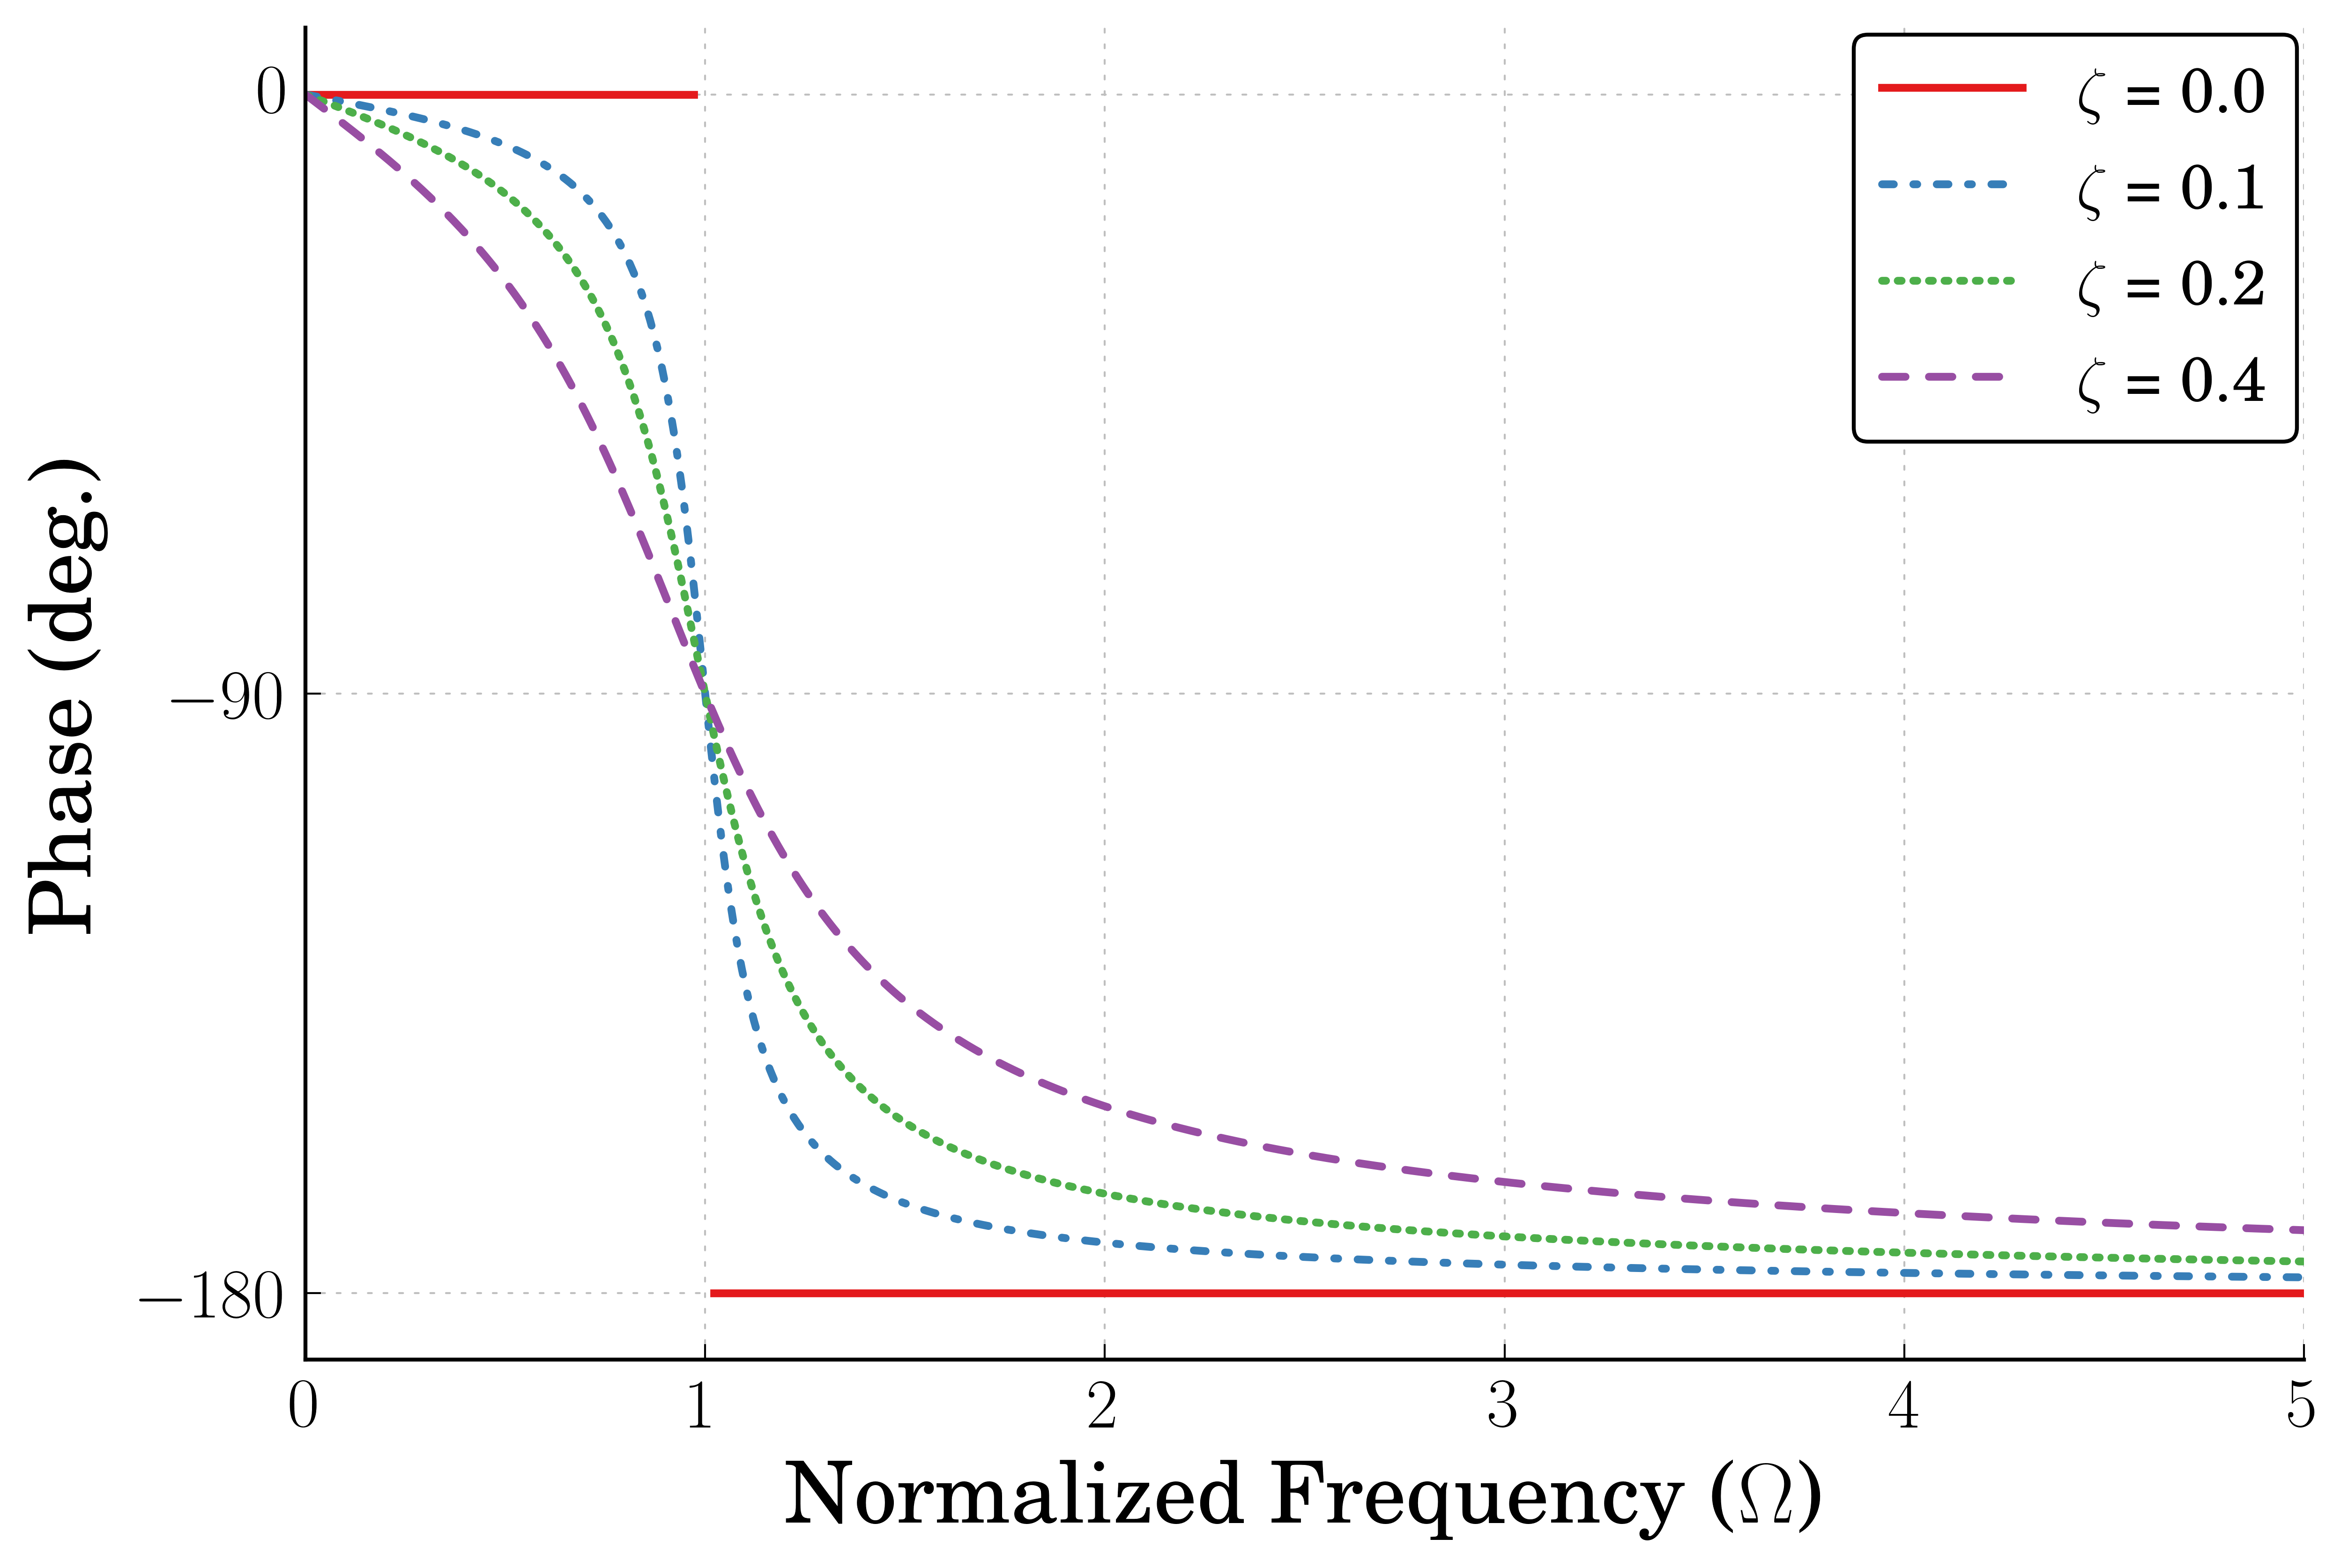

In [7]:
# Now let's plot the phase


# Plot the Phase Response
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency ($\Omega$)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Phase (deg.)',family='Serif',fontsize=22,weight='bold',labelpad=8)

plt.plot(wun, phase_un, linewidth=2, label=r'$\zeta$ = 0.0')
plt.plot(w, phase_0p1, linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.1')
plt.plot(w, phase_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
plt.plot(w, phase_0p4, linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.4')

plt.xlim(0,5)
plt.ylim(-190,10)
plt.yticks([-180,-90,0])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Forced_Freq_Resp_Phase.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

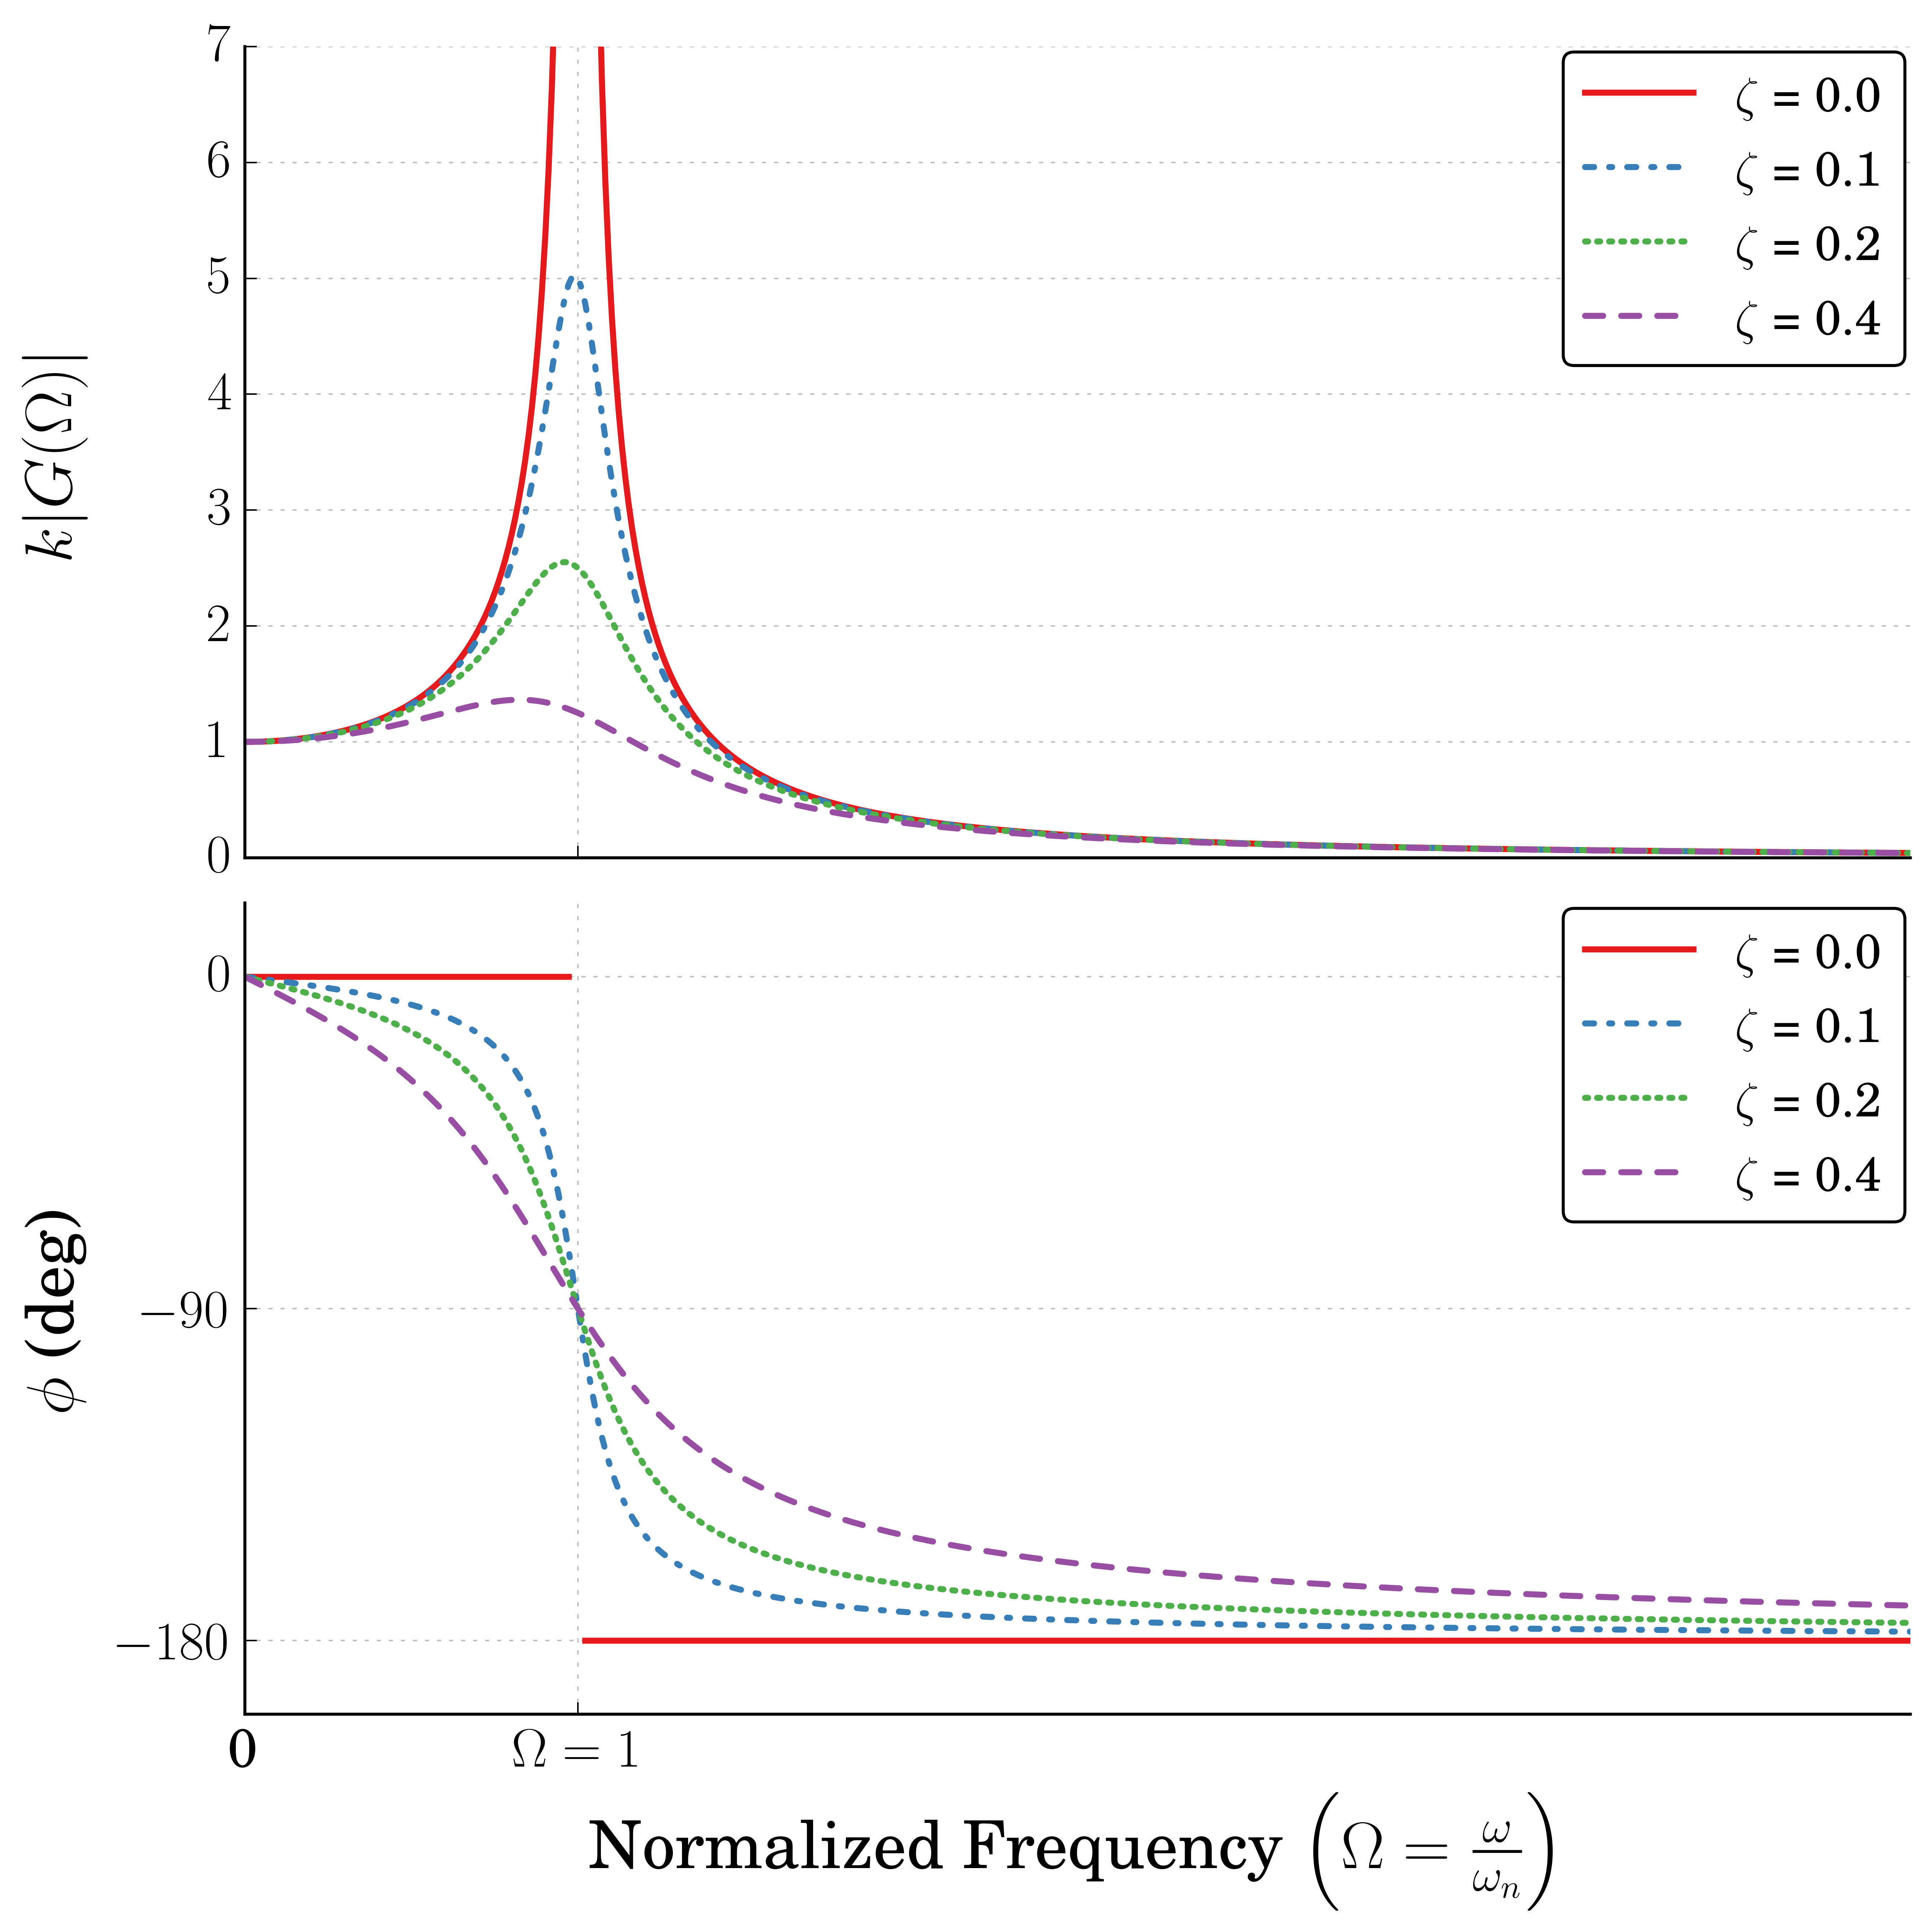

In [8]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.xticks([0,1],['0','$\Omega = 1$'])

# Magnitude plot
ax1.set_ylabel(r'$ k|G(\Omega)| $',family='serif',fontsize=22,weight='bold',labelpad=40)
ax1.plot(wun, k*mag_normal_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax1.plot(w, k*mag_normal_0p1, linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.1')
ax1.plot(w, k*mag_normal_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax1.plot(w, k*mag_normal_0p4, linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.4')
ax1.set_ylim(0.0,7.0)
ax1.set_yticks([0,1,2,3,4,5],['0', '1'])

ax1.leg = ax1.legend(loc='upper right', fancybox=True)
ltext  = ax1.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
# ax2.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
ax2.plot(wun, phase_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax2.plot(w, phase_0p1, linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.1')
ax2.plot(w, phase_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax2.plot(w, phase_0p4, linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.4')
ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([0, -90, -180])

ax2.leg = ax2.legend(loc='upper right', fancybox=True)
ltext  = ax2.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_SeismicTF.pdf',dpi=300)

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [9]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())